## Initialization

In [1]:
import blackhc.notebook

Appended /home/adibi/rmg7/MIP/BatchBALD/src to paths
Switched to directory /home/adibi/rmg7/MIP/BatchBALD
%load_ext autoreload
%autoreload 2


In [2]:
import torch

In [3]:
import al_notebook.results_loader as rl
import al_notebook.plots as alp
from acquisition_functions import AcquisitionFunction
from acquisition_method import AcquisitionMethod
from dataset_enum import DatasetEnum

In [4]:
import numpy as np

In [5]:
import prettyprinter as pp

In [6]:
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

In [8]:
#MARKERS = ("X", "s", "o")
MARKERS = None

## Common functions


In [9]:
def acc_label_axes():
    plt.xlabel('Acquired dataset size')
    plt.ylabel('Accuracy')

## MNIST

In [10]:
stores = rl.load_experiment_results('paper')

ValueError: Type names and field names must be valid identifiers: 'Distribution of training set classes:'

In [31]:
pp.pprint(rl.get_any(stores).args)

al_notebook.results_loader._args(
    batch_size=64,
    scoring_batch_size=1000,
    test_batch_size=1000,
    validation_set_size=1000,
    early_stopping_patience=3,
    epochs=30,
    epoch_samples=5056,
    num_inference_samples=20,
    available_sample_k=10,
    num_iterations=100,
    no_cuda=False,
    name='bald_20_1023109',
    seed=1023109,
    log_interval=10,
    type=acquisition_functions.AcquisitionFunction.bald,
    acquisition_method=acquisition_method.AcquisitionMethod.independent,
    dataset=dataset_enum.DatasetEnum.mnist
)


In [32]:
pp.pprint(rl.diff_args(stores))

{
    'num_inference_samples': {100, 50, 10, 20},
    'available_sample_k': {40, 1, 10, 5},
    'num_iterations': {None, 100, 20},
    'type': {
        acquisition_functions.AcquisitionFunction.variation_ratios,
        acquisition_functions.AcquisitionFunction.random,
        acquisition_functions.AcquisitionFunction.bald,
        acquisition_functions.AcquisitionFunction.mean_stddev
    },
    'acquisition_method': {
        acquisition_method.AcquisitionMethod.independent,
        acquisition_method.AcquisitionMethod.multibald
    },
    'dataset': {
        dataset_enum.DatasetEnum.emnist,
        dataset_enum.DatasetEnum.repeated_mnist_w_noise2,
        dataset_enum.DatasetEnum.repeated_mnist_w_noise,
        dataset_enum.DatasetEnum.mnist_w_noise,
        dataset_enum.DatasetEnum.mnist,
        dataset_enum.DatasetEnum.cinic10,
        dataset_enum.DatasetEnum.repeated_mnist_w_noise5
    },
    'num_acquired_points': {
        260,
        263,
        267,
        270,
        

### Increasing acquisition size

{
    'available_sample_k': {40, 1, 10},
    'num_iterations': {None, 100, 20},
    'num_acquired_points': {263, 267, 208, 820, 245, 246, 276, 1020}
}
{
    'Batch acquisition size 10': {
        'num_trials': 12,
        'num_inference_samples': {20},
        'available_sample_k': {10},
        'num_iterations': {100},
        'type': {acquisition_functions.AcquisitionFunction.bald},
        'acquisition_method': {
            acquisition_method.AcquisitionMethod.independent
        },
        'dataset': {dataset_enum.DatasetEnum.mnist},
        'num_acquired_points': {1020},
        'num_initial_samples': {20},
        'tag': {'paper'}
    },
    'Batch acquisition size 40': {
        'num_trials': 12,
        'num_inference_samples': {20},
        'available_sample_k': {40},
        'num_iterations': {20},
        'type': {acquisition_functions.AcquisitionFunction.bald},
        'acquisition_method': {
            acquisition_method.AcquisitionMethod.independent
        },
        '

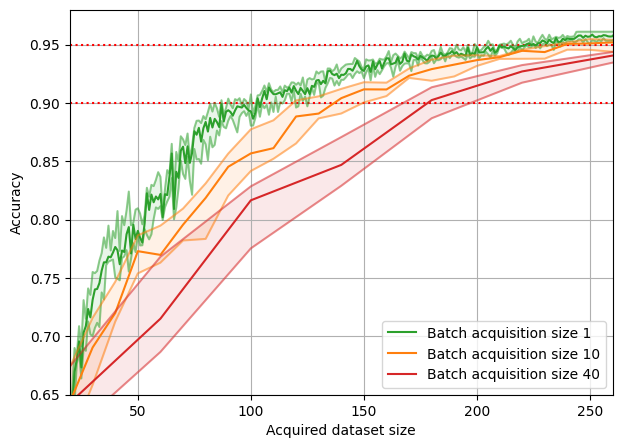

In [13]:
filtered = {}

def filter_exps(name, store):
    vip_args = rl.get_vip_args(store)

    if vip_args.ds != DatasetEnum.mnist:
        return False

    if vip_args.nis == 0:
        return False

    if vip_args.am != AcquisitionMethod.independent:
        return False

    if vip_args.af != AcquisitionFunction.bald:
        return False

    if vip_args.k not in (20, ):
        return False

    return vip_args.b in (1, 10, 40)

    return False


filtered.update(rl.filter_dict(stores, kv=filter_exps))

pp.pprint(rl.diff_args(filtered))

def key2text(name, store):
    vip_args = rl.get_vip_args(store)

    return f'Batch acquisition size {vip_args.b}'


grouped_by = rl.groupby_dict(
    filtered,
    key_kv=key2text)

pp.pprint(rl.map_dict(grouped_by, v=lambda stores: rl.get_stores_info(stores)))
          
grouped_by = rl.map_dict(grouped_by, v=lambda stores: rl.aggregate_accuracies(stores, thresholds=(90, 95)))

sorted_dict = rl.sort_dict(grouped_by, v=rl.get_threshold_quantiles_key)

plt.figure(figsize=(7, 5))
#plt.title("BALD for increasing acquisition size")
alp.plot_aggregated_groups(sorted_dict,
                           show_num_trials=False,
                           show_quantiles=False, markers=MARKERS)
plt.axis([20, 260, 0.65, 0.98])
acc_label_axes()
plt.grid(True)
plt.legend()

output_path = blackhc.notebook.original_dir + '/BALD_inc_acq_size.png'
alp.plot_save(output_path, dpi=300)
plt.show()

### BALD vs BatchBALD on MNIST

{
    'available_sample_k': {1, 10},
    'acquisition_method': {
        acquisition_method.AcquisitionMethod.independent,
        acquisition_method.AcquisitionMethod.multibald
    },
    'initial_percentage': {None, 100},
    'reduce_percentage': {0, None},
    'num_acquired_points': {288, 196, 260, 297, 298, 300, 270, 245, 287}
}
dict_keys(['BALD acquisition size 10', 'BALD acquisition size 1', 'BatchBALD acquisition size 10'])
{
    'BALD acquisition size 10': {
        'num_trials': 6,
        'keys': [
            'paper/mnist_independent_bald_k100_b10_1029338.py',
            'paper/mnist_independent_bald_k100_b10_1038804.py',
            'paper/mnist_independent_bald_k100_b10_572400.py',
            'paper/mnist_independent_bald_k100_b10_661442.py',
            'paper/mnist_independent_bald_k100_b10_734490.py',
            'paper/mnist_independent_bald_k100_b10_926965.py'
        ],
        'num_inference_samples': {100},
        'available_sample_k': {10},
        'initial_sam

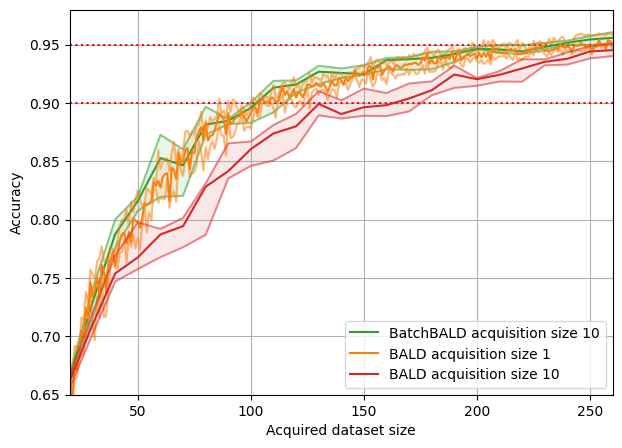

In [14]:
#%%capture c
#c=None

filtered = {}

def filter_exps(name, store):
    vip_args = rl.get_vip_args(store)

    if vip_args.ds != DatasetEnum.mnist:
        return False

    if vip_args.nis == 0:
        return False
      
    if vip_args.nap < 100:
        return False

    if vip_args.am not in (AcquisitionMethod.multibald, AcquisitionMethod.independent):
        return False
    
    if vip_args.am == AcquisitionMethod.independent and vip_args.af not in (AcquisitionFunction.bald, AcquisitionFunction.random):
        return False
    
    if (vip_args.am, vip_args.af) == (AcquisitionMethod.independent, AcquisitionFunction.random):
        return False

    if (vip_args.am, vip_args.af) == (AcquisitionMethod.independent, AcquisitionFunction.bald):
        if vip_args.b == 1:
            if vip_args.k != 100:
                return False
        else:
            if vip_args.k not in (100,):
                return False
       
    if vip_args.am == AcquisitionMethod.multibald:
        if vip_args.k != 100:
            return False

    return vip_args.b in (1, 10)
    


filtered.update(rl.filter_dict(stores, kv=filter_exps))

pp.pprint(rl.diff_args(filtered))


def key2text(name, store):    
    vip_args = rl.get_vip_args(store)
    am, af = vip_args.am, vip_args.af
    if (am, af) == (AcquisitionMethod.independent, AcquisitionFunction.random):
        return 'Random acquisition'
    elif (am, af) == (AcquisitionMethod.independent, AcquisitionFunction.bald):
        return f'BALD acquisition size {vip_args.b}'
    elif am == AcquisitionMethod.multibald:
        return f'BatchBALD acquisition size {vip_args.b}'
    raise ValueError(vip_args)


grouped_by = rl.groupby_dict(
    filtered,
    key_kv=key2text)

pp.pprint(grouped_by.keys())

pp.pprint(rl.map_dict(grouped_by, v=lambda stores: rl.get_stores_info(stores, True)))
          
grouped_by = rl.map_dict(grouped_by, v=lambda stores: rl.aggregate_accuracies(stores, thresholds=(90, 95)))

sorted_dict = rl.sort_dict(grouped_by, v=rl.get_threshold_quantiles_key)

plt.figure(figsize=(7, 5))
#plt.title("MNIST BALD and BatchBALD comparison")
alp.plot_aggregated_groups(sorted_dict,
                           show_num_trials=False,
                           show_quantiles=False, markers=MARKERS)
plt.axis([20, 260, 0.65, 0.98])
acc_label_axes()
plt.grid(True)
plt.legend()

output_path = blackhc.notebook.original_dir + '/MNIST_BALD_BATCHBALD.png'
alp.plot_save(output_path, dpi=300)
plt.show()

### BatchBALD with increasing b

{
    'available_sample_k': {40, 10, 5},
    'experiment_description': {
        'Additional paper experiments (#1): RMNIST w/ noise, MNIST w/ noise, '
            'MNIST, with initial samples',
        'Reproduce b1, 5, 10 k10, 100 and default initial samples, no initial '
            'samples for all methods with BALD. (No culling!)'
    },
    'experiments_laaos': {
        './experiment_configs/paper_exp1/configs.py',
        './experiment_configs/big_repro_b10_k100/configs.py'
    },
    'num_acquired_points': {260, 300, 270, 240, 275, 340, 245, 215, 255}
}
{
    'Batch acquisition size 10': {
        'num_trials': 6,
        'num_inference_samples': {100},
        'available_sample_k': {10},
        'initial_samples': {
            (
                38043,
                40091,
                17418,
                2094,
                39879,
                3133,
                5011,
                40683,
                54379,
                24287,
                9849,
 

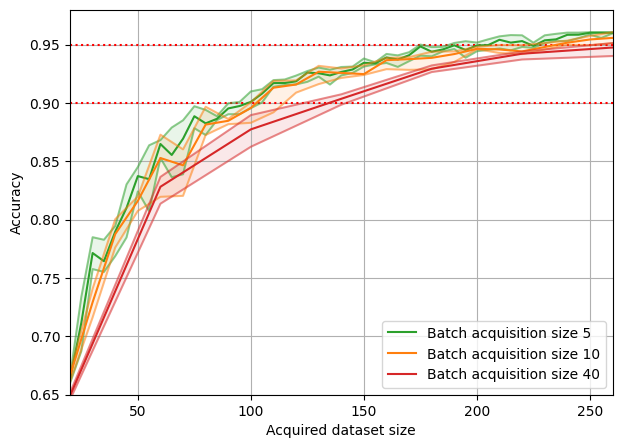

In [15]:
filtered = {}

def filter_exps(name, store):
    vip_args = rl.get_vip_args(store)

    if vip_args.ds not in (
            DatasetEnum.mnist, ):  #, DatasetEnum.mnist_w_noise):
        return False

    if vip_args.nis == 0:
        return False
    
    if vip_args.nap < 100:
        return False

    if (vip_args.am, vip_args.af) not in ((AcquisitionMethod.multibald,
                                           AcquisitionFunction.bald),):
        return False
    
    if vip_args.k != 100:
        return False
    
    return True

filtered.update(rl.filter_dict(stores, kv=filter_exps))

pp.pprint(rl.diff_args(filtered))


def key2text(name, store):

    vip_args = rl.get_vip_args(store)
    am, af = vip_args.am, vip_args.af
    if (am, af) == (AcquisitionMethod.multibald, AcquisitionFunction.bald):
        return f'Batch acquisition size {vip_args.b}'
    raise ValueError(vip_args)


grouped_by = rl.groupby_dict(filtered,
                             key_kv=rl.get_diff_args_key2text(
                                 filtered, ['tag'] + rl.culling_fields))

grouped_by = rl.groupby_dict(filtered,
                             key_kv=key2text)


pp.pprint(rl.map_dict(grouped_by, v=lambda stores: rl.get_stores_info(stores)))

grouped_by = rl.map_dict(
    grouped_by,
    v=lambda stores: rl.aggregate_accuracies(stores, thresholds=(90, 95)))

sorted_dict = rl.sort_dict(grouped_by, v=rl.get_threshold_quantiles_key)

plt.figure(figsize=(7, 5))
#plt.title("BatchBALD for increasing acquisition size")
alp.plot_aggregated_groups(sorted_dict,
                           show_num_trials=False,
                           show_quantiles=False)
plt.axis([20, 260, 0.65, 0.98])
acc_label_axes()
plt.grid(True)
plt.legend()

output_path = blackhc.notebook.original_dir + '/BatchBALD_increasing_b.png'
alp.plot_save(output_path, dpi=300)
plt.show()

### Time spent on MNIST BALD b1 vs BatchBALD b10

In [16]:
batchbalds_b10 = [
            'paper/mnist_multibald_bald_k100_b10_661442.py',
            'paper/mnist_multibald_bald_k100_b10_572400.py',
            'paper/mnist_multibald_bald_k100_b10_1038804.py',
            'paper/mnist_multibald_bald_k100_b10_926965.py',
            'paper/mnist_multibald_bald_k100_b10_734490.py',
            'paper/mnist_multibald_bald_k100_b10_1029338.py'
        ]
balds_b1 = [
            'paper/mnist_independent_bald_k100_b1_926965.py',
            'paper/mnist_independent_bald_k100_b1_661442.py',
            'paper/mnist_independent_bald_k100_b1_734490.py',
            'paper/mnist_independent_bald_k100_b1_1038804.py',
            'paper/mnist_independent_bald_k100_b1_572400.py',
            'paper/mnist_independent_bald_k100_b1_1029338.py'
        ],

{
    'available_sample_k': {1, 10},
    'acquisition_method': {
        acquisition_method.AcquisitionMethod.independent,
        acquisition_method.AcquisitionMethod.multibald
    },
    'initial_percentage': {None, 100},
    'reduce_percentage': {0, None},
    'num_acquired_points': {288, 196, 260, 297, 298, 300, 270, 245, 287}
}
dict_keys(['BALD acquisition size 10', 'BALD acquisition size 1', 'BatchBALD acquisition size 10'])
{
    'BALD acquisition size 10': {
        'num_trials': 6,
        'keys': [
            'paper/mnist_independent_bald_k100_b10_1029338.py',
            'paper/mnist_independent_bald_k100_b10_1038804.py',
            'paper/mnist_independent_bald_k100_b10_572400.py',
            'paper/mnist_independent_bald_k100_b10_661442.py',
            'paper/mnist_independent_bald_k100_b10_734490.py',
            'paper/mnist_independent_bald_k100_b10_926965.py'
        ],
        'num_inference_samples': {100},
        'available_sample_k': {10},
        'initial_sam

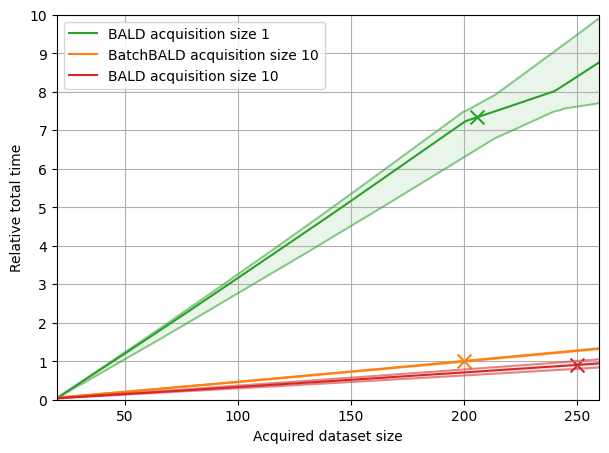

In [17]:
#%%capture c
#c=None

filtered = {}


def filter_exps(name, store):
    vip_args = rl.get_vip_args(store)

    if vip_args.ds != DatasetEnum.mnist:
        return False

    if vip_args.nis == 0:
        return False

    if vip_args.nap < 100:
        return False

    if vip_args.am not in (AcquisitionMethod.multibald,
                           AcquisitionMethod.independent):
        return False

    if vip_args.am == AcquisitionMethod.independent and vip_args.af not in (
            AcquisitionFunction.bald, AcquisitionFunction.random):
        return False

    if (vip_args.am, vip_args.af) == (AcquisitionMethod.independent,
                                      AcquisitionFunction.random):
        return False

    if (vip_args.am, vip_args.af) == (AcquisitionMethod.independent,
                                      AcquisitionFunction.bald):
        if vip_args.tag in ('repro', 'k20', 'k40', 'k5', 'k1',
                            'coreset_bald_vs_bald', 'bald_b5_k20'):
            return False

        if vip_args.b == 1:
            if vip_args.k != 100:
                return False
        else:
            if vip_args.k not in (100, ):
                return False

    if vip_args.am == AcquisitionMethod.multibald:
        if store.tag == 'k5':
            return False
        if vip_args.k != 100:
            return False

    return vip_args.b in (1, 10)


filtered.update(rl.filter_dict(stores, kv=filter_exps))

pp.pprint(rl.diff_args(filtered))


def key2text(name, store):
    vip_args = rl.get_vip_args(store)
    am, af = vip_args.am, vip_args.af
    if (am, af) == (AcquisitionMethod.independent, AcquisitionFunction.random):
        return 'Random acquisition'
    elif (am, af) == (AcquisitionMethod.independent, AcquisitionFunction.bald):
        return f'BALD acquisition size {vip_args.b}'
    elif am == AcquisitionMethod.multibald:
        return f'BatchBALD acquisition size {vip_args.b}'
    raise ValueError(vip_args)


grouped_by = rl.groupby_dict(filtered, key_kv=key2text)

pp.pprint(grouped_by.keys())

pp.pprint(
    rl.map_dict(grouped_by, v=lambda stores: rl.get_stores_info(stores, True)))


def values_getter(store):
    #return np.cumsum([iteration.train_model_elapsed_time for iteration in store.iterations])
    return np.cumsum([
        iteration.train_model_elapsed_time +
        iteration.batch_acquisition_elapsed_time
        for iteration in store.iterations
    ])


grouped_by_absolute = rl.map_dict(
    grouped_by,
    v=lambda stores: rl.aggregate_values(stores, values_getter, thresholds=()))

rel_time_unit = grouped_by_absolute['BatchBALD acquisition size 10'].quantiles[
    1, 19]


def values_getter_rel(store):
    #return np.cumsum([iteration.train_model_elapsed_time for iteration in store.iterations])
    return np.cumsum([
        iteration.train_model_elapsed_time +
        iteration.batch_acquisition_elapsed_time
        for iteration in store.iterations
    ]) / rel_time_unit


grouped_by_relative = rl.map_dict(
    grouped_by,
    v=lambda stores: rl.aggregate_values(
        stores, values_getter_rel, thresholds=()))

sorted_dict = {
    k: grouped_by_relative[k]
    for k in [
        'BALD acquisition size 1',
        'BatchBALD acquisition size 10',
        'BALD acquisition size 10',
    ]
}

#tmp = alp.COLOR_ORDER
#alp.COLOR_ORDER = [tmp[1], tmp[0], tmp[2]]

plt.figure(figsize=(7, 5))
#plt.title("MNIST BALD and BatchBALD comparison")
alp.plot_aggregated_groups(sorted_dict,
                           show_num_trials=False,
                           show_quantiles=False,
                           markers=MARKERS)

plt.scatter(206,
            sorted_dict['BALD acquisition size 1'].quantiles[1, 187],
            marker='x', s=100, 
            color=alp.COLOR_ORDER[0])
plt.scatter(200,
            sorted_dict['BatchBALD acquisition size 10'].quantiles[1, 19],
            marker='x', s=100,
            color=alp.COLOR_ORDER[1])
plt.scatter(250,
            sorted_dict['BALD acquisition size 10'].quantiles[1, 24],
            marker='x', s=100,
            color=alp.COLOR_ORDER[2])

#alp.COLOR_ORDER = tmp

plt.axis([20, 260, 0, 10])
plt.xlabel('Acquired dataset size')
plt.ylabel('Relative total time')
plt.yticks(ticks=range(11))
plt.grid(True)
plt.legend()

output_path = blackhc.notebook.original_dir + '/MNIST_BALD_BATCHBALD_time_perf.png'
alp.plot_save(output_path, dpi=300)
plt.show()

## RMNIST

### RMNIST vs BALD

{
    'available_sample_k': {10, 5},
    'type': {
        acquisition_functions.AcquisitionFunction.random,
        acquisition_functions.AcquisitionFunction.bald
    },
    'acquisition_method': {
        acquisition_method.AcquisitionMethod.independent,
        acquisition_method.AcquisitionMethod.multibald
    },
    'experiment_description': {
        'RMNIST with noise k10 b5 and b10 (and k100 b10), BALD, BatchBALD and '
            'heuristic',
        'RMNIST with noise k10 b5 and b10 (and k100 b10), random acquisition'
    },
    'experiments_laaos': {
        './experiment_configs/rmnist_noise_random/configs.py',
        './experiment_configs/rmnist_w_noise/configs.py'
    },
    'num_acquired_points': {280, 300, 260}
}
{
    'BALD': {
        'num_trials': 6,
        'num_inference_samples': {10},
        'available_sample_k': {10},
        'type': {acquisition_functions.AcquisitionFunction.bald},
        'acquisition_method': {
            acquisition_method.AcquisitionMeth

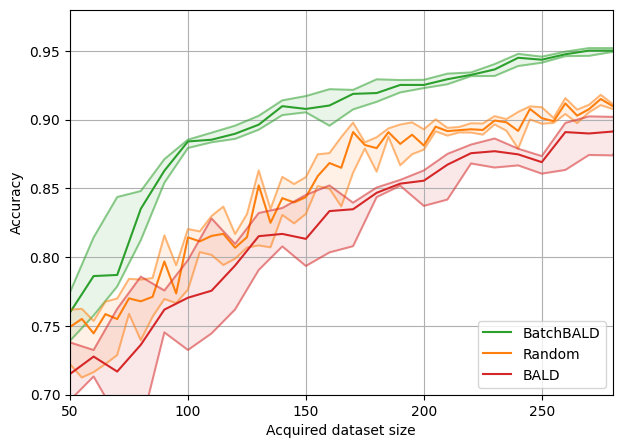

In [18]:
for show_b in (10,):
    filtered = {}
    
    def filter_exps(name, store):
        vip_args = rl.get_vip_args(store)

        if vip_args.ds not in (DatasetEnum.repeated_mnist_w_noise,): #, DatasetEnum.mnist_w_noise):
            return False

        if vip_args.nis == 0:
            return False


    #     if vip_args.nap < 300:
    #         return False

        if (vip_args.am, vip_args.af) not in ((AcquisitionMethod.multibald,
                                               AcquisitionFunction.bald),
                                              (AcquisitionMethod.independent,
                                               AcquisitionFunction.bald),
                                              (AcquisitionMethod.independent, AcquisitionFunction.random)):
            return False

        if vip_args.af == AcquisitionFunction.bald:
            if vip_args.k not in (10,):
                return False

            if vip_args.b not in (show_b,):
                return False
        return True

    filtered.update(rl.filter_dict(stores, kv=filter_exps))

    pp.pprint(rl.diff_args(filtered))


    def key2text(name, store):

        vip_args = rl.get_vip_args(store)
        am, af = vip_args.am, vip_args.af
        if (am, af) == (AcquisitionMethod.independent, AcquisitionFunction.random):
            return 'Random'
        elif (am, af) == (AcquisitionMethod.independent, AcquisitionFunction.bald):
            return f'BALD'
        elif (am, af) == (AcquisitionMethod.multibald, AcquisitionFunction.bald):
            return f'BatchBALD'
        raise ValueError(vip_args)


    #grouped_by = rl.groupby_dict(filtered, key_kv=rl.get_diff_args_key2text(filtered, ('tag',)))
    grouped_by = rl.groupby_dict(filtered, key_kv=key2text)

    pp.pprint(rl.map_dict(grouped_by, v=lambda stores: rl.get_stores_info(stores)))

    grouped_by = rl.map_dict(
        grouped_by,
        v=lambda stores: rl.aggregate_accuracies(stores, thresholds=(90, 95)))

    sorted_dict = rl.sort_dict(grouped_by, v=rl.get_threshold_quantiles_key)

    plt.figure(figsize=(7, 5))
    #plt.title("RMNIST")
    alp.plot_aggregated_groups(sorted_dict,
                               show_num_trials=False,
                               show_quantiles=False,
                               show_thresholds=False)
    plt.axis([50, 280, 0.7, 0.98])
    acc_label_axes()
    plt.grid(True)
    plt.legend(loc='lower right')

    output_path = blackhc.notebook.original_dir + '/RMNIST.png'
    alp.plot_save(output_path, dpi=300)
    plt.show()

### Other methods

{
    'available_sample_k': {10, 5},
    'type': {
        acquisition_functions.AcquisitionFunction.variation_ratios,
        acquisition_functions.AcquisitionFunction.random,
        acquisition_functions.AcquisitionFunction.bald,
        acquisition_functions.AcquisitionFunction.mean_stddev
    },
    'acquisition_method': {
        acquisition_method.AcquisitionMethod.independent,
        acquisition_method.AcquisitionMethod.multibald
    },
    'experiment_description': {
        'RMNIST with noise k10 b5 and b10 (and k100 b10), BALD, BatchBALD and '
            'heuristic',
        'RMNIST with noise k10 b5 and b10 (and k100 b10), random acquisition',
        'RMNIST with noise k100 var ratios and mean stddev'
    },
    'experiments_laaos': {
        './experiment_configs/rmnist_w_noise_other_methods/configs.py',
        './experiment_configs/rmnist_noise_random/configs.py',
        './experiment_configs/rmnist_w_noise/configs.py'
    },
    'num_acquired_points': {320, 280, 300

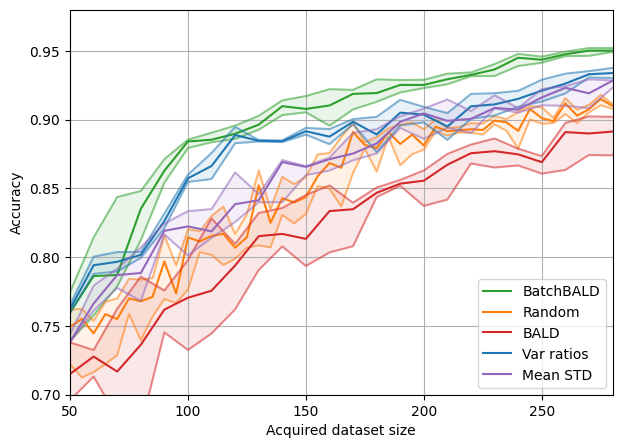

In [19]:
for show_b in (10, ):
    filtered = {}

    def filter_exps(name, store):
        vip_args = rl.get_vip_args(store)

        if vip_args.ds not in (DatasetEnum.repeated_mnist_w_noise,
                               ):  #, DatasetEnum.mnist_w_noise):
            return False

        if vip_args.nis == 0:
            return False

    #     if vip_args.nap < 300:
    #         return False

#         if (vip_args.am, vip_args.af) not in ((AcquisitionMethod.multibald,
#                                                AcquisitionFunction.bald),
#                                               (AcquisitionMethod.independent,
#                                                AcquisitionFunction.bald),
#                                               (AcquisitionMethod.independent, AcquisitionFunction.random)):
#             return False

        if vip_args.af != AcquisitionFunction.random:
            if vip_args.k not in (10, ):
                return False

            if vip_args.b not in (show_b, ):
                return False
        return True

    filtered.update(rl.filter_dict(stores, kv=filter_exps))

    pp.pprint(rl.diff_args(filtered))

    def key2text(name, store):

        vip_args = rl.get_vip_args(store)
        am, af = vip_args.am, vip_args.af
        if (am, af) == (AcquisitionMethod.independent,
                        AcquisitionFunction.random):
            return 'Random'
        elif (am, af) == (AcquisitionMethod.independent,
                          AcquisitionFunction.bald):
            return f'BALD'
        elif (am, af) == (AcquisitionMethod.independent,
                          AcquisitionFunction.variation_ratios):
            return f'Var ratios'
        elif (am, af) == (AcquisitionMethod.independent,
                          AcquisitionFunction.mean_stddev):
            return f'Mean STD'
        elif (am, af) == (AcquisitionMethod.multibald,
                          AcquisitionFunction.bald):
            return f'BatchBALD'
        raise ValueError(vip_args)

    #grouped_by = rl.groupby_dict(filtered, key_kv=rl.get_diff_args_key2text(filtered, ('tag',)))
    grouped_by = rl.groupby_dict(filtered, key_kv=key2text)

    pp.pprint(
        rl.map_dict(grouped_by, v=lambda stores: rl.get_stores_info(stores)))

    grouped_by = rl.map_dict(
        grouped_by,
        v=lambda stores: rl.aggregate_accuracies(stores, thresholds=(90, 95)))

    #sorted_dict = rl.sort_dict(grouped_by, v=rl.get_threshold_quantiles_key)

    sorted_dict = {
        key: grouped_by[key]
        for key in ['BatchBALD', 'Random', 'BALD', 'Var ratios', 'Mean STD']
    }

    plt.figure(figsize=(7, 5))
    #plt.title("RMNIST")
    alp.plot_aggregated_groups(sorted_dict,
                               show_num_trials=False,
                               show_quantiles=False,
                               show_thresholds=False)
    plt.axis([50, 280, 0.7, 0.98])
    acc_label_axes()
    plt.grid(True)
    plt.legend(loc='lower right')

    output_path = blackhc.notebook.original_dir + '/RMNIST_others.png'
    alp.plot_save(output_path, dpi=300)
    plt.show()

## EMNIST

{
    'num_trials': 18,
    'num_inference_samples': {10},
    'available_sample_k': {5},
    'type': {
        acquisition_functions.AcquisitionFunction.random,
        acquisition_functions.AcquisitionFunction.bald
    },
    'acquisition_method': {
        acquisition_method.AcquisitionMethod.independent,
        acquisition_method.AcquisitionMethod.multibald
    },
    'experiment_description': {
        'EMNIST_balanced with random acquisition',
        'EMNIST with b5 and k10, k100 with both BALD and BatchBALD'
    },
    'initial_percentage': {50, None},
    'reduce_percentage': {10, None},
    'min_remaining_percentage': {None, 30},
    'min_candidates_per_acquired_item': {None, 100},
    'dataset': {dataset_enum.DatasetEnum.emnist},
    'initial_samples': {()},
    'experiments_laaos': {
        './experiment_configs/emnist_bbb/configs.py',
        './experiment_configs/emnist_random/configs.py'
    },
    'quickquick': {False},
    'initial_samples_per_class': {2},
    'num_a

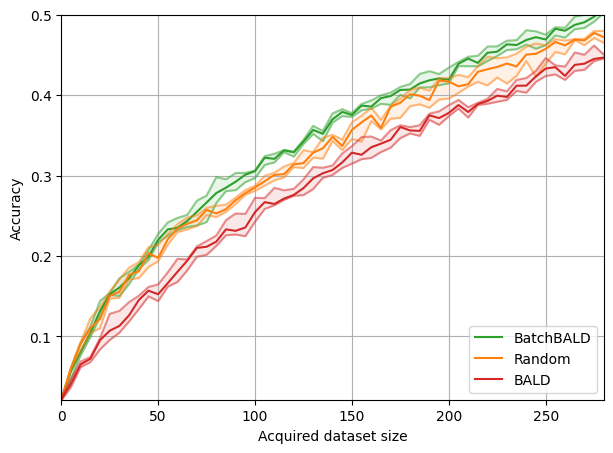

In [20]:
filtered = {}


def filter_exps(name, store):
    vip_args = rl.get_vip_args(store)

    if vip_args.ds not in (
            DatasetEnum.emnist, ):  #, DatasetEnum.mnist_w_noise):
        return False

    if vip_args.nis != 0:
        return False
    
    if vip_args.nap < 100:
        return False

#     if vip_args.nap < 300:
#         return False

    if vip_args.k != 10:
        return False

    if (vip_args.am, vip_args.af) not in ((AcquisitionMethod.multibald,
                                           AcquisitionFunction.bald),
                                          (AcquisitionMethod.independent,
                                           AcquisitionFunction.bald),
                                          (AcquisitionMethod.independent,
                                           AcquisitionFunction.random)):
        return False

    
    return True

filtered.update(rl.filter_dict(stores, kv=filter_exps))

pp.pprint(rl.get_stores_info(filtered))


def key2text(name, store):

    vip_args = rl.get_vip_args(store)
    am, af = vip_args.am, vip_args.af
    if (am, af) == (AcquisitionMethod.independent, AcquisitionFunction.random):
        return 'Random'
    elif (am, af) == (AcquisitionMethod.independent, AcquisitionFunction.bald):
        return f'BALD'
    if (am, af) == (AcquisitionMethod.multibald, AcquisitionFunction.bald):
        return f'BatchBALD'
    raise ValueError(vip_args)


grouped_by = rl.groupby_dict(filtered,
                             key_kv=rl.get_diff_args_key2text(
                                 filtered, ['tag'] + rl.culling_fields))

grouped_by = rl.groupby_dict(filtered,
                             key_kv=key2text)


pp.pprint(rl.map_dict(grouped_by, v=lambda stores: rl.get_stores_info(stores)))

grouped_by = rl.map_dict(
    grouped_by,
    v=lambda stores: rl.aggregate_accuracies(stores, thresholds=(40, 45)))

sorted_dict = rl.sort_dict(grouped_by, v=rl.get_threshold_quantiles_key)

plt.figure(figsize=(7, 5))
#plt.title("EMNIST")
alp.plot_aggregated_groups(sorted_dict,
                           show_num_trials=False,
                           show_quantiles=False, show_thresholds=False)
plt.axis([0, 0+280, 1/47, 0.5])
acc_label_axes()
plt.grid(True)
plt.legend(loc='lower right')

output_path = blackhc.notebook.original_dir + '/EMNIST_zero_initial_data.png'
alp.plot_save(output_path, dpi=300)
plt.show()